In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

LIHTC_data = pd.ExcelFile("2018-LIHTC-Tenant-Tables.xlsx")

sheets = {}
for sheet_name in LIHTC_data.sheet_names:
    sheets[sheet_name] = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name=sheet_name)

## Table 8


In [2]:
# Drop the the irrelevant rows and columns
sheets["Table 8"] = sheets["Table 8"].drop(columns=['Unnamed: 9'])
sheets["Table 8"] = sheets["Table 8"].drop([57,58,59,60,61])

# Get the correct headers
sheets["Table 8"].iloc[0, 0] = sheets["Table 8"].iloc[1, 0]
sheets["Table 8"].iloc[0, 3:9] = sheets["Table 8"].iloc[1, 3:9]

# Replace '$' with '\$' so that it would not be recognized as inline math
for i in range(5, 8):
    sheets["Table 8"].iloc[0][i] = sheets["Table 8"].iloc[0][i].replace('$', '\$')

# Set the new headers
sheets["Table 8"].columns = sheets["Table 8"].iloc[0]

# Clean up
sheets["Table 8"] = sheets["Table 8"].iloc[2:]
sheets["Table 8"] = sheets["Table 8"].replace('New York1','New York')
sheets["Table 8"] = sheets["Table 8"].replace(to_replace = "Data Not Reported", value = np.nan)
sheets["Table 8"].columns = sheets["Table 8"].columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
sheets["Table 8"].index = sheets["Table 8"].iloc[:58, 0].values
sheets["Table 8"] = sheets["Table 8"].drop(columns=['State'])

In [3]:
sheets["Table 8"].head()

,Properties Reported (%),Income Reported (%),Median Income ($),"<= $5,000 (%)","\$5,001 to \$10,000 (%)","\$10,001 to \$15,000 (%)","\$15,001 to \$20,000 (%)","> $20,000 (%)"
Alabama,86.36364,96.42633,16380.0,5.70456,18.78422,20.12993,20.35576,35.02552
Alaska,100.00000,78.39081,21487.0,3.81232,2.93255,14.07625,25.31769,53.86119
Arizona,94.71154,98.28224,18912.0,6.59438,15.63772,15.58299,14.57742,47.60748
Arkansas,98.32869,99.04057,13068.0,10.64426,25.53688,22.01214,16.69001,25.11671
California,81.15494,93.76841,20764.0,2.95568,5.23305,26.53737,13.63478,51.63913


One bar Graph for median income by state.

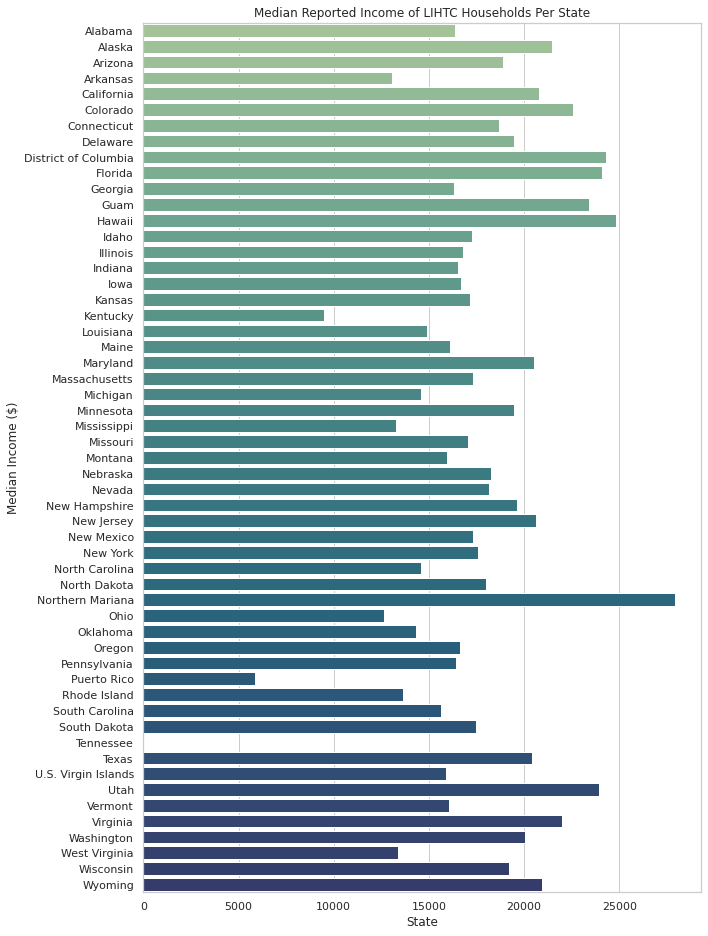

In [16]:
# Set the figure size
plt.figure(figsize=(10,16))

# Set the figure style
sns.set_theme(style='whitegrid')

#sns.color_palette("cubehelix", as_cmap=True)
sns.barplot(x='Median Income ($)', y= sheets["Table 8"].index, data = sheets["Table 8"],palette=sns.color_palette("crest", sheets["Table 8"].index.size))

# Set the x- and y-axis labels and title
plt.xlabel("State")
plt.ylabel("Median Income ($)")
plt.title("Median Reported Income of LIHTC Households Per State")
plt.show()

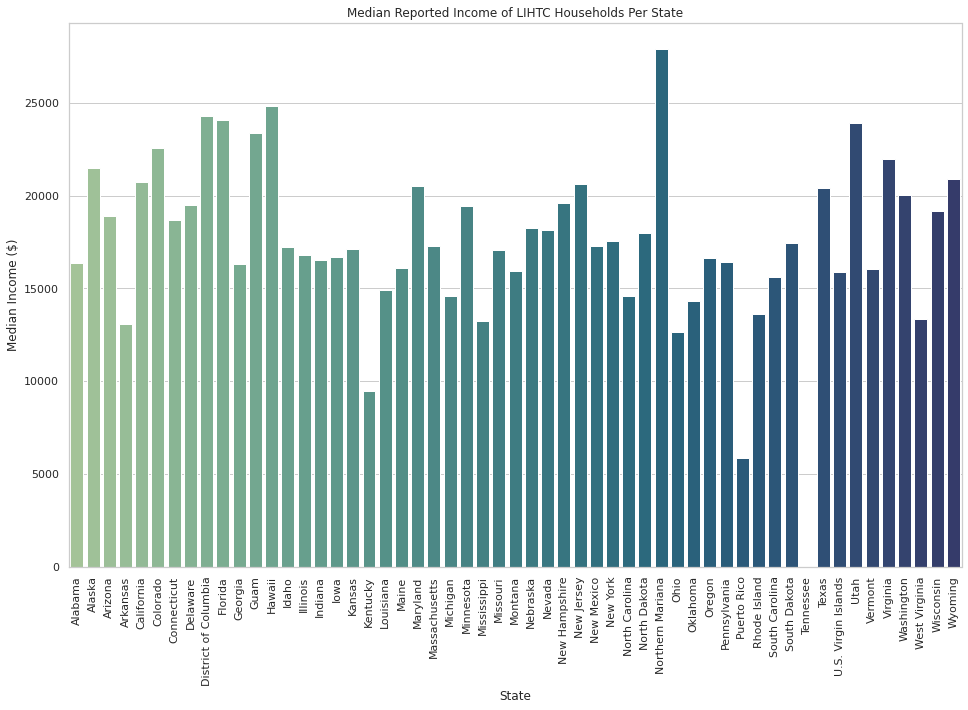

In [15]:
# Set the figure size
plt.figure(figsize=(16,10))

# Set the figure style
sns.set_theme(style='whitegrid')

median_income_by_state = sns.barplot(y='Median Income ($)', x= sheets['Table 8'].index, data = sheets['Table 8'], palette=sns.color_palette("crest", sheets["Table 8"].index.size))
median_income_by_state.set_xticklabels(median_income_by_state.get_xticklabels(), rotation=90)

# Set the x- and y-axis labels and title
plt.xlabel('State')
plt.ylabel('Median Income ($)')
plt.title('Median Reported Income of LIHTC Households Per State')
plt.show()

A stacked bar graph for showing distribution of income.

<AxesSubplot:title={'center':'Distribution of Income of LIHTC Households Per State'}, xlabel='State', ylabel='Percentage'>

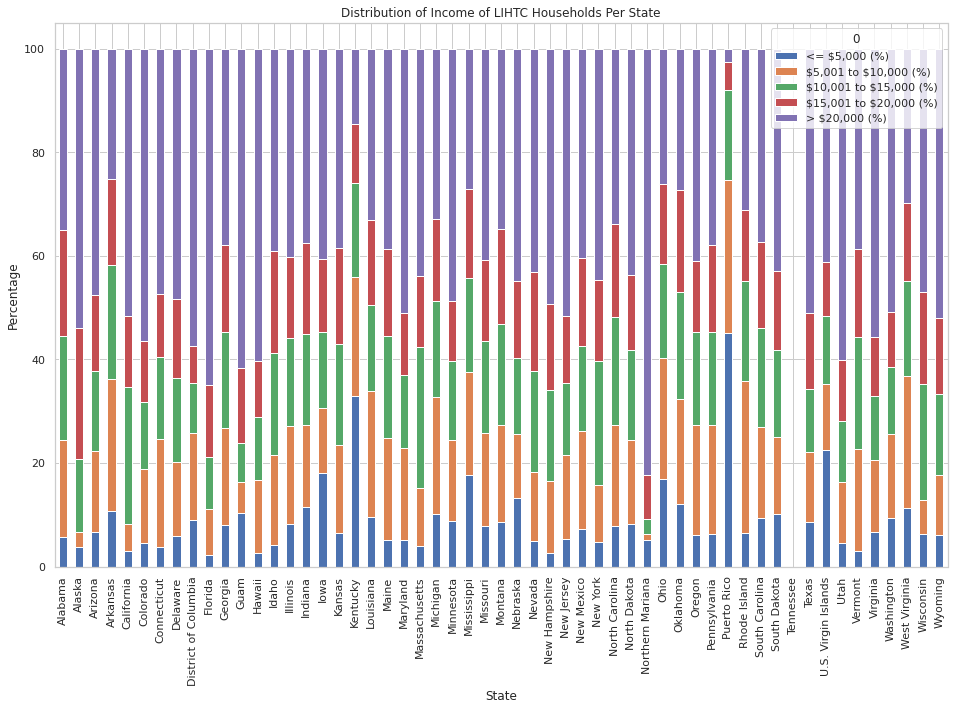

In [46]:

distribution_of_income = pd.DataFrame(sheets["Table 8"][['<= $5,000 (%)', '\$5,001 to \$10,000 (%)', '\$10,001 to \$15,000 (%)','\$15,001 to \$20,000 (%)', '> $20,000 (%)']])

distribution_of_income.plot.bar(figsize=(16,10), stacked=True, xlabel='State', ylabel='Percentage', title='Distribution of Income of LIHTC Households Per State')


In [24]:
sheets["Table 8"].columns

# '<= $5,000 (%)', '\$5,001 to \$10,000 (%)', '\$10,001 to \$15,000 (%)',
#       '\$15,001 to \$20,000 (%)', '> $20,000 (%)'
sheets["Table 8"][['<= $5,000 (%)' , '\$5,001 to \$10,000 (%)']]

,"<= $5,000 (%)","\$5,001 to \$10,000 (%)"
Alabama,5.70456,18.78422
Alaska,3.81232,2.93255
Arizona,6.59438,15.63772
Arkansas,10.64426,25.53688
California,2.95568,5.23305
Colorado,4.45637,14.42297
Connecticut,3.80726,20.75696
Delaware,5.98528,14.20636
District of Columbia,8.89779,16.85595
Florida,2.32641,8.81353


## Table 12

In [8]:
# Drop the the irrelevant rows
sheets["Table 12"] = sheets["Table 12"].drop([57,58,59,60,61])

# Get the correct headers
sheets["Table 12"].iloc[0, 0] = sheets["Table 12"].iloc[1, 0]
sheets["Table 12"].iloc[0, 4:13] = sheets["Table 12"].iloc[1, 4:13]

# Set the new headers
sheets["Table 12"].columns = sheets["Table 12"].iloc[0]

# Clean up
sheets["Table 12"] = sheets["Table 12"].iloc[2:]
sheets["Table 12"] = sheets["Table 12"].replace('New York1','New York')
sheets["Table 12"] = sheets["Table 12"].replace(to_replace = "Data Not Reported", value = np.nan)
sheets["Table 12"].columns = sheets["Table 12"].columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
sheets["Table 12"].index = sheets["Table 12"].iloc[:58, 0].values
sheets["Table 12"] = sheets["Table 12"].drop(columns=['State'])

In [9]:
sheets["Table 12"].head()

,Reported Amount of Federal Rental Assistance > $0 (%),Source of Federal Rental Assistance Reported (%),Source of Federal Rental Assistance,HUD Section 8 Moderate Rehabilitation (%),Public Housing Operating Subsidy (%),HOME Rental Assistance (%),"HUD Housing Choice Voucher (HCV), Tenant-Based (%)",HUD Project-Based Voucher (PBV) (%),USDA Section 521 Rental Assistance Program (%),Other Federal Rental Assistance (%),Not Reported (%),Total (%)
Alabama,38.64736,38.64736,13.59965,0.00000,0.00000,0.00728,19.34076,0.00000,18.66405,48.38827,0.0,100.00001
Alaska,36.41577,34.98208,1.63934,12.90984,0.20492,0.00000,14.54918,17.82787,52.86885,0.00000,0.0,100.00000
Arizona,12.08103,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,20.89051,20.44245,6.74658,0.78767,0.13699,0.06849,12.97945,35.00000,38.93836,5.34247,0.0,100.00001
California,37.99137,35.89672,21.51056,3.55344,0.83879,0.96447,29.59122,31.48384,8.99392,3.06376,0.0,100.00001
